In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import time
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


# 1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum

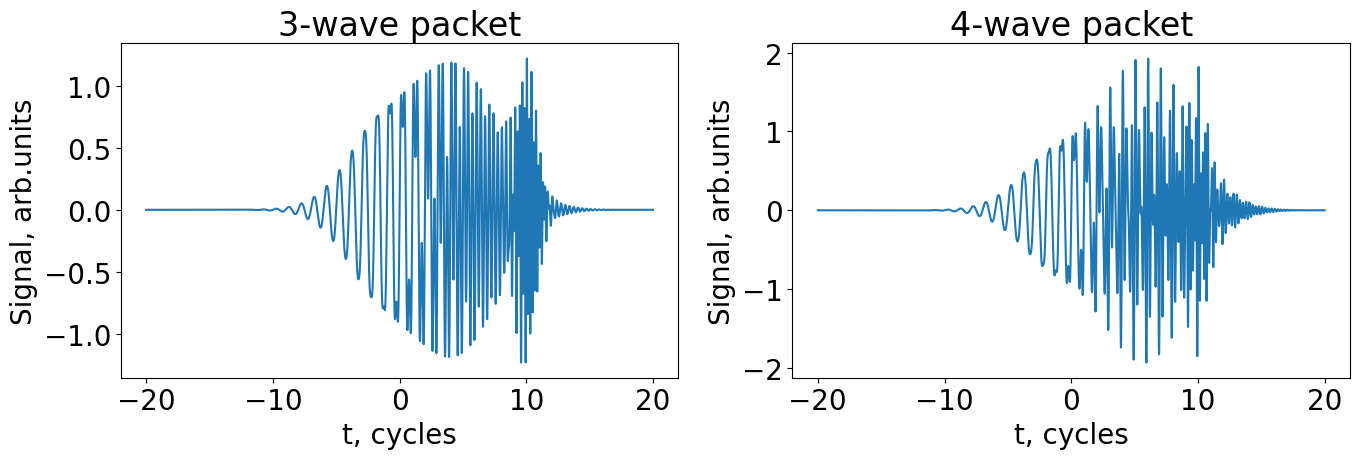

In [ ]:
# generate the signal
nofts=1000
#t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14+5)
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9+6)
y = np.sin(t)*np.exp(-t**2/2/20**2)
y = y + np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
y = y + np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
y_4 = y + np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/20**2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), squeeze=True)

axes[0].plot(t/2/np.pi, y)
axes[0].set_xlabel('t, cycles')
axes[0].set_ylabel('Signal, arb.units');
axes[0].set_title('3-wave packet')

axes[1].plot(t/2/np.pi, y_4)
axes[1].set_xlabel('t, cycles')
axes[1].set_ylabel('Signal, arb.units')
axes[1].set_title('4-wave packet')

plt.tight_layout()

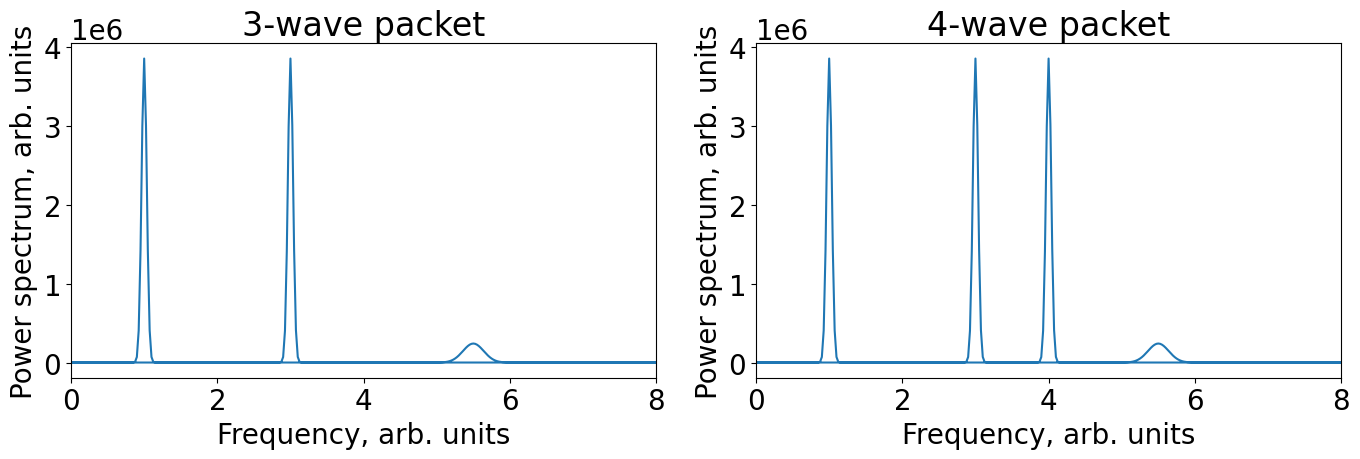

In [ ]:
sp_3 = np.fft.fft(y)
sp_4 = np.fft.fft(y_4)
w = np.fft.fftfreq(len(y_4), d=(t[1]-t[0])/2/np.pi)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(w, np.abs(sp_3)**2)
axes[0].set_xlim(0, 8)
axes[0].set_xlabel('Frequency, arb. units')
axes[0].set_ylabel('Power spectrum, arb. units')
axes[0].set_title('3-wave packet');

axes[1].plot(w, np.abs(sp_4)**2)
axes[1].set_xlim(0, 8)
axes[1].set_xlabel('Frequency, arb. units')
axes[1].set_ylabel('Power spectrum, arb. units')
axes[1].set_title('4-wave packet')

plt.tight_layout()

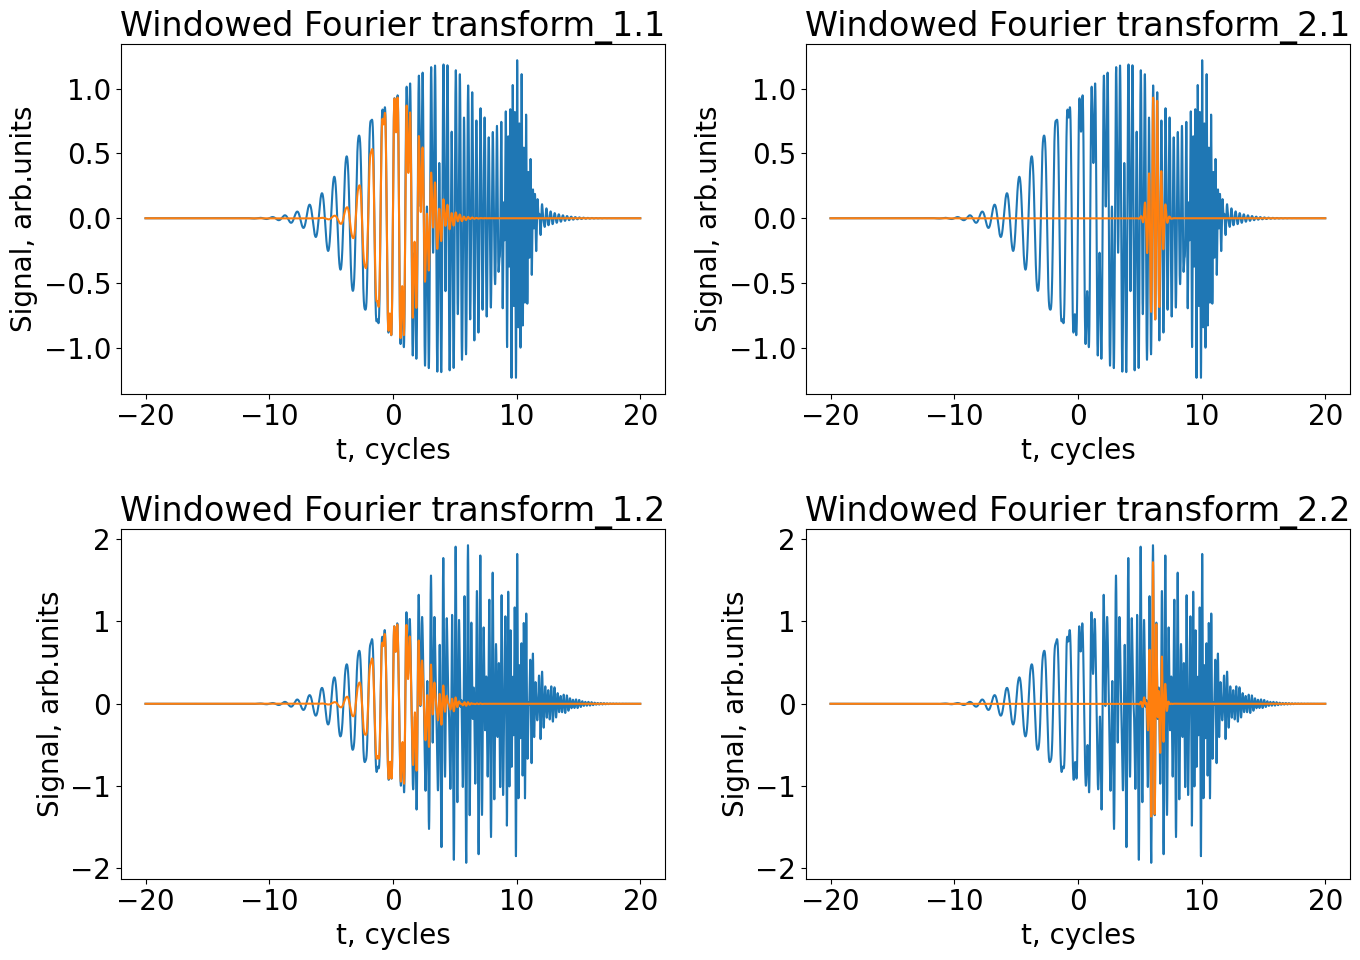

In [ ]:
# windowed Fourier transform (Gabor transform, spectrogram)
window_width_1 = 2.0*2*np.pi
window_position_1 = 0.0*2*np.pi
window_function_1 = np.exp(-(t-window_position_1)**2/2/window_width_1**2)
y_window_1 = y * window_function_1
y_window_3 = y_4 * window_function_1

# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum
window_width_2 = (t[0] - t[-1]) / 100
window_position_2 = np.linspace(t[0], t[-1], 100)[65]
window_function_2 = np.exp(-(t-window_position_2)**2/2/window_width_2**2)
y_window_2 = y * window_function_2
y_window_4 = y_4 * window_function_2

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(t/2/np.pi, y)
axes[0, 0].plot(t/2/np.pi, y_window_1)
axes[0, 0].set_xlabel('t, cycles')
axes[0, 0].set_ylabel('Signal, arb.units')
axes[0, 0].set_title('Windowed Fourier transform_1.1');

axes[0, 1].plot(t/2/np.pi, y)
axes[0, 1].plot(t/2/np.pi, y_window_2)
axes[0, 1].set_xlabel('t, cycles')
axes[0, 1].set_ylabel('Signal, arb.units')
axes[0, 1].set_title('Windowed Fourier transform_2.1');

axes[1, 0].plot(t/2/np.pi, y_4)
axes[1, 0].plot(t/2/np.pi, y_window_3)
axes[1, 0].set_xlabel('t, cycles')
axes[1, 0].set_ylabel('Signal, arb.units')
axes[1, 0].set_title('Windowed Fourier transform_1.2');

axes[1, 1].plot(t/2/np.pi, y_4)
axes[1, 1].plot(t/2/np.pi, y_window_4)
axes[1, 1].set_xlabel('t, cycles')
axes[1, 1].set_ylabel('Signal, arb.units')
axes[1, 1].set_title('Windowed Fourier transform_2.2');
plt.tight_layout()

# 2. Implement the spectrogram, show the effect of 1 on the spectrogram. Don’t forget to label the axes

In [ ]:
def get_specgram(t, y, nwindowsteps=100, freq_limit=10):
    t_space = t
    window_width = (t_space[-1] - t_space[0]) / nwindowsteps
    window_positions = np.linspace(t_space[0], t_space[-1], nwindowsteps)
    w_spec = np.fft.fftfreq(len(y), d=(t_space[1]-t_space[0]) / 2 / np.pi)

    idx = np.where(w_spec >= freq_limit)[0][0] if freq_limit else -1
    w_spec = w_spec[:idx]

    spec_per_step = np.array([]).reshape(0, idx)
    for w_pos in window_positions:
        freq_values = np.zeros(w_spec.shape)

        window_function = np.exp(-(t_space - w_pos) ** 2 / 2 / window_width ** 2)
        y_window = y * window_function

        sp = np.fft.fft(y_window)
        sp = np.abs(sp) ** 2
        sp = sp[:idx]
        spec_per_step = np.vstack([spec_per_step, sp])

    spectrogram = np.array(spec_per_step).T
    return w_spec, spectrogram

Text(0.5, 1.0, '3-wave packet')

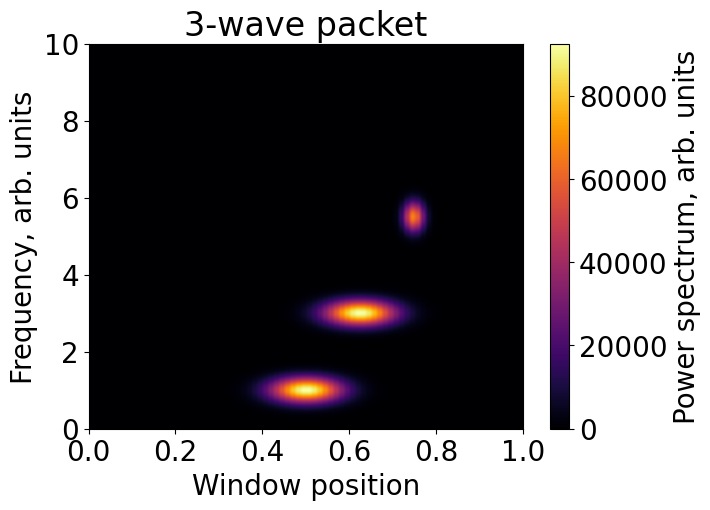

In [ ]:
# plot spectrogram, explain what you see
nw_step = 80
_, spectrogram_3 = get_specgram(t, y, nw_step)

plt.imshow(spectrogram_3, aspect='auto', cmap='inferno', origin='lower', extent=[0, 1, 0, 10])
plt.colorbar(label='Power spectrum, arb. units')
plt.ylabel('Frequency, arb. units')
plt.xlabel('Window position')
plt.title('3-wave packet')

Text(0.5, 1.0, '4-wave packet')

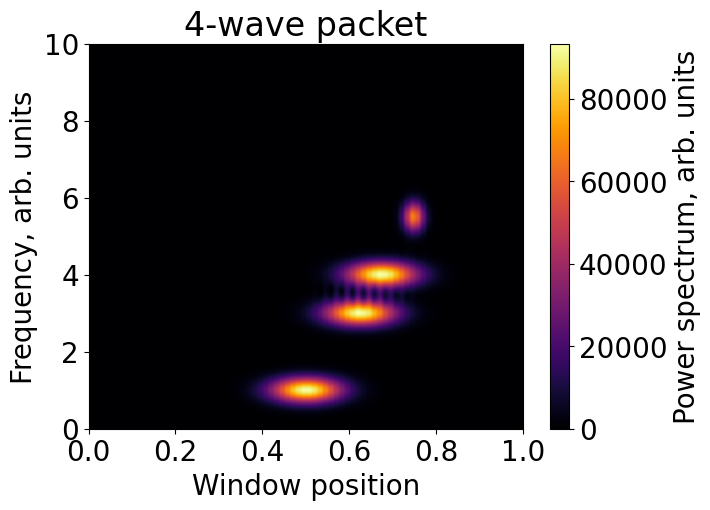

In [ ]:
_, spectrogram_4 = get_specgram(t, y_4, nw_step)

plt.imshow(spectrogram_4, aspect='auto', cmap='inferno', origin='lower', extent=[0, 1, 0, 10])
plt.colorbar(label='Power spectrum, arb. units')
plt.ylabel('Frequency, arb. units')
plt.xlabel('Window position')
plt.title('4-wave packet')

# 3.Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps. Measure the timing, can you explain the difference?

In [ ]:
def compare(t_steps=2**14, nw_step=100):
    t = np.linspace(-20*2*np.pi, 20*2*np.pi, t_steps)
    y = np.sin(t) * np.exp(-t**2/2/20**2)
    y = y + np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2)
    y = y + np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
    y_4 = y + np.sin(4*t) * np.exp(-(t-7*2*np.pi)**2/2/20**2)
    sp, spec_per_step = get_specgram(t, y_4, nw_step)
    return

In [ ]:
%%timeit -n 10 -r 7
compare(t_steps=2**14)

270 ms ± 94.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10 -r 7
compare(t_steps=2**14-5)

291 ms ± 52.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10 -r 7
compare(t_steps=2**14-10)

277 ms ± 51.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10 -r 7
compare(t_steps=2**14+5)

354 ms ± 72.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit -n 10 -r 7
compare(t_steps=2**14+10)

344 ms ± 73.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The FFT algorithm has optimal performance for signal lengths that are powers of 2 because it relies on a divide-and-conquer strategy that recursively breaks down the computation into smaller subproblems. When the signal length is not a power of 2, additional computations may be needed to pad or truncate the signal, leading to increased processing time.

When t_steps is set to 2**14, the number of time steps is a power of 2, resulting in a faster computation time. However, when deviate from this by subtracting or adding a small number (e.g., 5 or 10), the FFT algorithm may become less efficient, leading to increased computation time.